<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

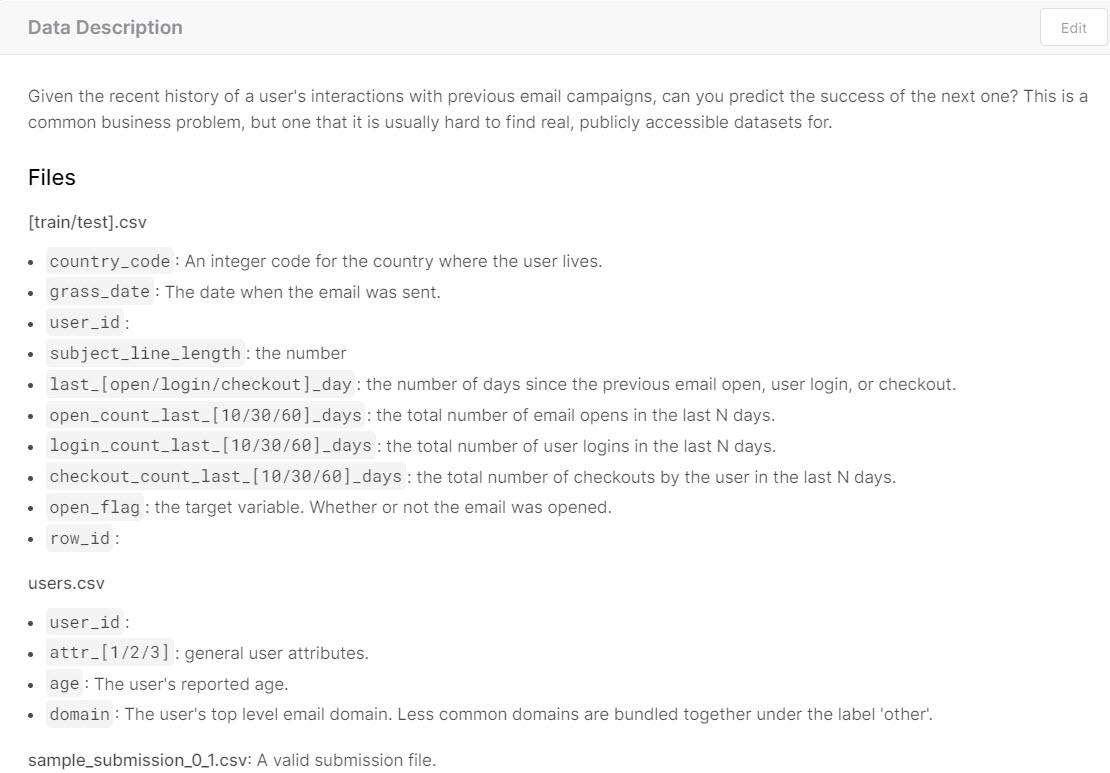

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

<h2><center>Model Training & Testing</center><h2>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
%matplotlib inline

#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from sklearn.externals import joblib

from sklearn.exceptions import DataConversionWarning
from warnings import simplefilter
import warnings

# ignore all DataConversionWarning warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

simplefilter(action='ignore', category=FutureWarning)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Reading dataset

In [2]:
#=========================================================================
# Read train data using pandas and first 5 rows of data
#=========================================================================

xls1    = pd.ExcelFile('data/X_train_scaled_dataset2.xlsx')
X_train = pd.read_excel(xls1, 'X_train_scaled')
y_train = pd.read_excel(xls1, 'y_train')

xls2    = pd.ExcelFile('data/X_test_scaled_dataset2.xlsx')
X_test  = pd.read_excel(xls2, 'X_test_scaled')
y_test  = pd.read_excel(xls2, 'y_test')

dataset = X_train
dataset['open_flag'] = y_train['open_flag']
X_train = X_train.drop(['open_flag'], axis=1)

X_train.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0.050837,-0.061833,0.542226,-0.300129,-0.056129,1.857672,0.497768,0.788793,0.495196,-0.649055,...,-0.2826,-0.052586,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473
1,0.050837,-1.038883,0.362759,3.525579,-0.151305,-0.610772,-0.728400,-0.790147,-0.794251,1.694443,...,-0.2826,-0.052586,-0.151201,-0.675049,-0.510358,2.155745,-0.379728,-0.310000,-0.231596,-0.200473
2,0.050837,-1.038883,0.003824,-0.358507,-0.128232,-0.605823,0.497768,-0.316465,-0.517941,0.711686,...,-0.2826,-0.052586,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473
3,0.050837,0.915217,2.606101,-0.354615,0.289963,-0.415276,1.723937,2.525628,1.232023,-0.649055,...,-0.2826,-0.052586,-0.151201,-0.675049,-0.510358,2.155745,-0.379728,-0.310000,-0.231596,-0.200473
4,0.050837,-1.038883,-2.060051,-0.358507,0.119801,-0.426412,0.089045,0.157217,0.218886,-0.649055,...,-0.2826,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473


<h3>Define Functions<h3>

In [3]:
#Generic function for making a classification model and accessing performance:

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [4]:
#-----------------------------------------------------------------
# Function for Random Decision Tree, Decision Tree CLassifier, 
# Random Forest Classifier and Gradient Boosting CLassifier
#-----------------------------------------------------------------
def classification_model_Test(model, X_train, y_train, X_test, y_test):
  #Fit the model:
  
  model.fit(X_train,y_train)

  print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))  
    
  #Make predictions on training set:
  predictions = model.predict(X_test)
     
  # Get performance metrics
  cm = confusion_matrix(y_test,predictions)
  print(metrics.classification_report(y_test,predictions))
  score = compute_score(clf=model, X=X_test, y=y_test, scoring='accuracy')
  r2_score = metrics.r2_score(y_test,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))
   
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 

In [5]:
#-----------------------------------------------------------------
# Function for Validation data testing
#-----------------------------------------------------------------
def classification_model_Val(model, X_val, y_val):
  
  print("Accuracy on training set: {:.3f}".format(model.score(X_val, y_val)))
  #Make predictions on training set:
  predictions = model.predict(X_val)
     
  # Get performance metrics
  cm = confusion_matrix(y_val,predictions)
  print(metrics.classification_report(y_val,predictions))
  score = compute_score(clf=model, X=X_val, y=y_val, scoring='accuracy')
  r2_score = metrics.r2_score(y_val,predictions)
  
  # Print performance metrics

  print ('*************************************************************')
  print ('Metric Performance of : {0}\n'.format(model.__class__))
  print('Confusion Matrix : \n', cm)
  print ('Cross Validation Score = {0:.3%}\n'.format(score))
  print ("Coefficient of determination:{0:.3f}".format(r2_score))


In [6]:
# Checking on the feature importance weightage
from sklearn.metrics import confusion_matrix

def features_importance(clf, data, predictors, outcome):
    target = data[outcome]
    train = data[predictors]

    clf = clf.fit(train,target)
    
    features = pd.DataFrame()
    features['feature'] = train.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    print ('*************************************************************')
    features.plot(title = 'Features Importance',fontsize= 8, kind='barh', figsize=(50, 10))
    featimp = pd.Series(clf.feature_importances_, index=predictors).sort_values(ascending=False)
    print (featimp)
    print('\n**********************************************************')

<h2><center>Create Model and test</center><h2>

In [7]:
outcome_var = 'open_flag'
predictor_var = X_train.columns

In [8]:
outcome_var

'open_flag'

In [9]:
predictor_var

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'weekday',
       'domain_@163.com', 'domain_@gmail.com', 'domain_@hotmail.com',
       'domain_@icloud.com', 'domain_@live.com', 'domain_@outlook.com',
       'domain_@qq.com', 'domain_@rocketmail.com', 'domain_@yahoo.com',
       'domain_@ymail.com', 'domain_other', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7'],
      dtype='object')

In [10]:
X_train.count()

attr_2                         100086
attr_3                         100086
subject_line_length            100086
last_open_day                  100086
last_login_day                 100086
last_checkout_day              100086
open_count_last_10_days        100086
open_count_last_30_days        100086
open_count_last_60_days        100086
login_count_last_10_days       100086
login_count_last_30_days       100086
login_count_last_60_days       100086
checkout_count_last_10_days    100086
checkout_count_last_30_days    100086
checkout_count_last_60_days    100086
weekday                        100086
domain_@163.com                100086
domain_@gmail.com              100086
domain_@hotmail.com            100086
domain_@icloud.com             100086
domain_@live.com               100086
domain_@outlook.com            100086
domain_@qq.com                 100086
domain_@rocketmail.com         100086
domain_@yahoo.com              100086
domain_@ymail.com              100086
domain_other

In [11]:
X_test.count()

attr_2                         12357
attr_3                         12357
subject_line_length            12357
last_open_day                  12357
last_login_day                 12357
last_checkout_day              12357
open_count_last_10_days        12357
open_count_last_30_days        12357
open_count_last_60_days        12357
login_count_last_10_days       12357
login_count_last_30_days       12357
login_count_last_60_days       12357
checkout_count_last_10_days    12357
checkout_count_last_30_days    12357
checkout_count_last_60_days    12357
weekday                        12357
domain_@163.com                12357
domain_@gmail.com              12357
domain_@hotmail.com            12357
domain_@icloud.com             12357
domain_@live.com               12357
domain_@outlook.com            12357
domain_@qq.com                 12357
domain_@rocketmail.com         12357
domain_@yahoo.com              12357
domain_@ymail.com              12357
domain_other                   12357
c

<h3>Random Forest Classifier<h3>

In [13]:
param_grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8,9,10,15,20],
    'criterion' :['gini', 'entropy']
}

In [15]:
model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 5,n_jobs=-1)
classification_model_Test(model, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Accuracy on training set: 0.986
Accuracy on test set: 0.950
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      6156
           1       0.93      0.98      0.95      6201

    accuracy                           0.95     12357
   macro avg       0.95      0.95      0.95     12357
weighted avg       0.95      0.95      0.95     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d 

*************************************************************
Metric Performance of : <class 'sklearn.model_selection._search.GridSearchCV'>

Confusion Matrix : 
 [[5686  470]
 [ 150 6051]]
Cross Validation Score = 83.871%

Coefficient of determination:0.799


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [16]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.986
Accuracy on test set: 0.949
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      6156
           1       0.93      0.98      0.95      6201

    accuracy                           0.95     12357
   macro avg       0.95      0.95      0.95     12357
weighted avg       0.95      0.95      0.95     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Confusion Matrix : 
 [[5679  477]
 [ 154 6047]]
Cross Validation Score = 83.758%

Coefficient of determination:0.796


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


*************************************************************
open_count_last_10_days        0.150987
open_count_last_30_days        0.139739
last_open_day                  0.113718
open_count_last_60_days        0.109707
subject_line_length            0.059785
last_login_day                 0.050459
login_count_last_60_days       0.046433
last_checkout_day              0.045424
login_count_last_30_days       0.040912
login_count_last_10_days       0.033321
weekday                        0.033024
checkout_count_last_60_days    0.027303
country_code_4                 0.021966
checkout_count_last_30_days    0.021136
country_code_1                 0.020413
attr_3                         0.020321
checkout_count_last_10_days    0.013006
country_code_3                 0.008342
domain_@gmail.com              0.008041
country_code_5                 0.007306
country_code_2                 0.006447
country_code_7                 0.005335
domain_@yahoo.com              0.003738
domain_@hotmail.co

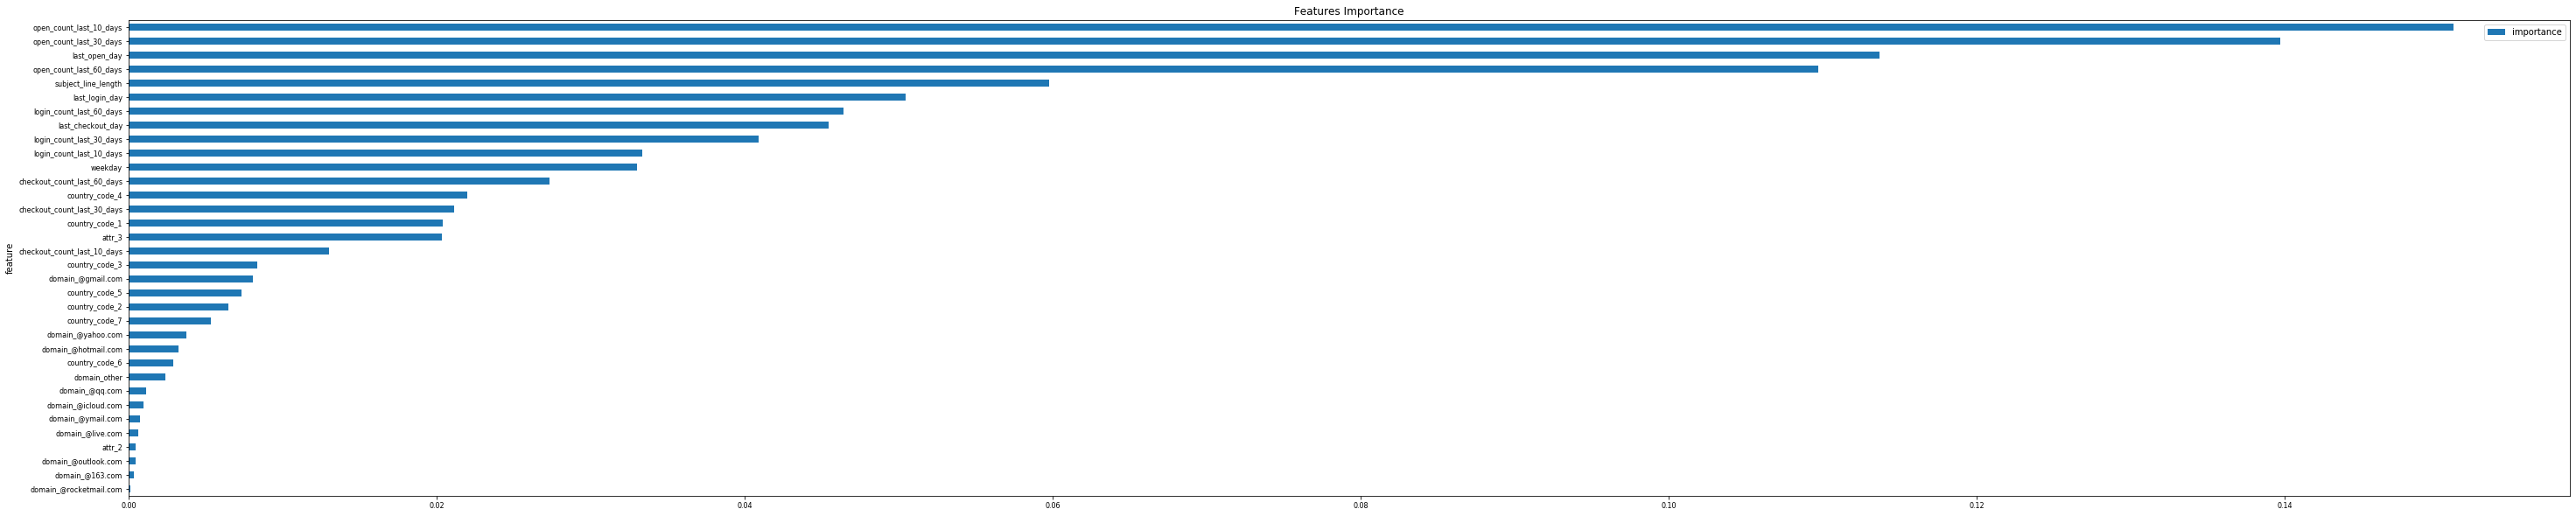

In [17]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 20,max_features = 'log2', n_estimators = 200)

classification_model_Test(model, X_train, y_train, X_test, y_test)
features_importance(model, dataset,predictor_var,outcome_var)
 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0164023 to fit


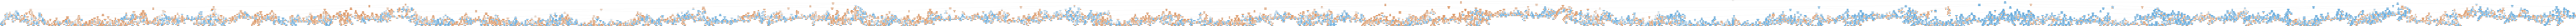

In [24]:
estimator_limited = model.estimators_[7]
export_graphviz(estimator_limited, out_file='Random_Forest_dataset1.dot', feature_names = predictor_var,
                class_names = outcome_var,
                rounded = True, proportion = False, precision = 2, filled = True)

!dot -Tpng Random_Forest_dataset1.dot -o Random_Forest_dataset1.png -Gdpi=600

from IPython.display import Image
Image(filename = 'Random_Forest_dataset1.png')

In [18]:
## We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/Random_Forest_trained_model_dataset2.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/Random_Forest_trained_model_dataset2.pkl') 


['model/Random_Forest_trained_model_dataset2.pkl']

<h3>Gradient Boosting Classifier<h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 1.000
Accuracy on test set: 0.974
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6156
           1       0.95      1.00      0.97      6201

    accuracy                           0.97     12357
   macro avg       0.97      0.97      0.97     12357
weighted avg       0.97      0.97      0.97     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

Confusion Matrix : 
 [[5858  298]
 [  28 6173]]
Cross Validation Score = 83.702%

Coefficient of determination:0.894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*************************************************************
last_open_day                  0.141407
open_count_last_60_days        0.132805
open_count_last_30_days        0.108769
open_count_last_10_days        0.091072
subject_line_length            0.066629
last_login_day                 0.059539
last_checkout_day              0.052181
login_count_last_60_days       0.051893
login_count_last_30_days       0.044106
weekday                        0.036003
login_count_last_10_days       0.035493
checkout_count_last_60_days    0.028447
checkout_count_last_30_days    0.022248
country_code_4                 0.020800
attr_3                         0.020548
country_code_1                 0.020505
checkout_count_last_10_days    0.012870
country_code_3                 0.008961
domain_@gmail.com              0.008676
country_code_5                 0.007487
country_code_2                 0.007232
country_code_7                 0.005120
domain_@yahoo.com              0.004099
country_code_6    

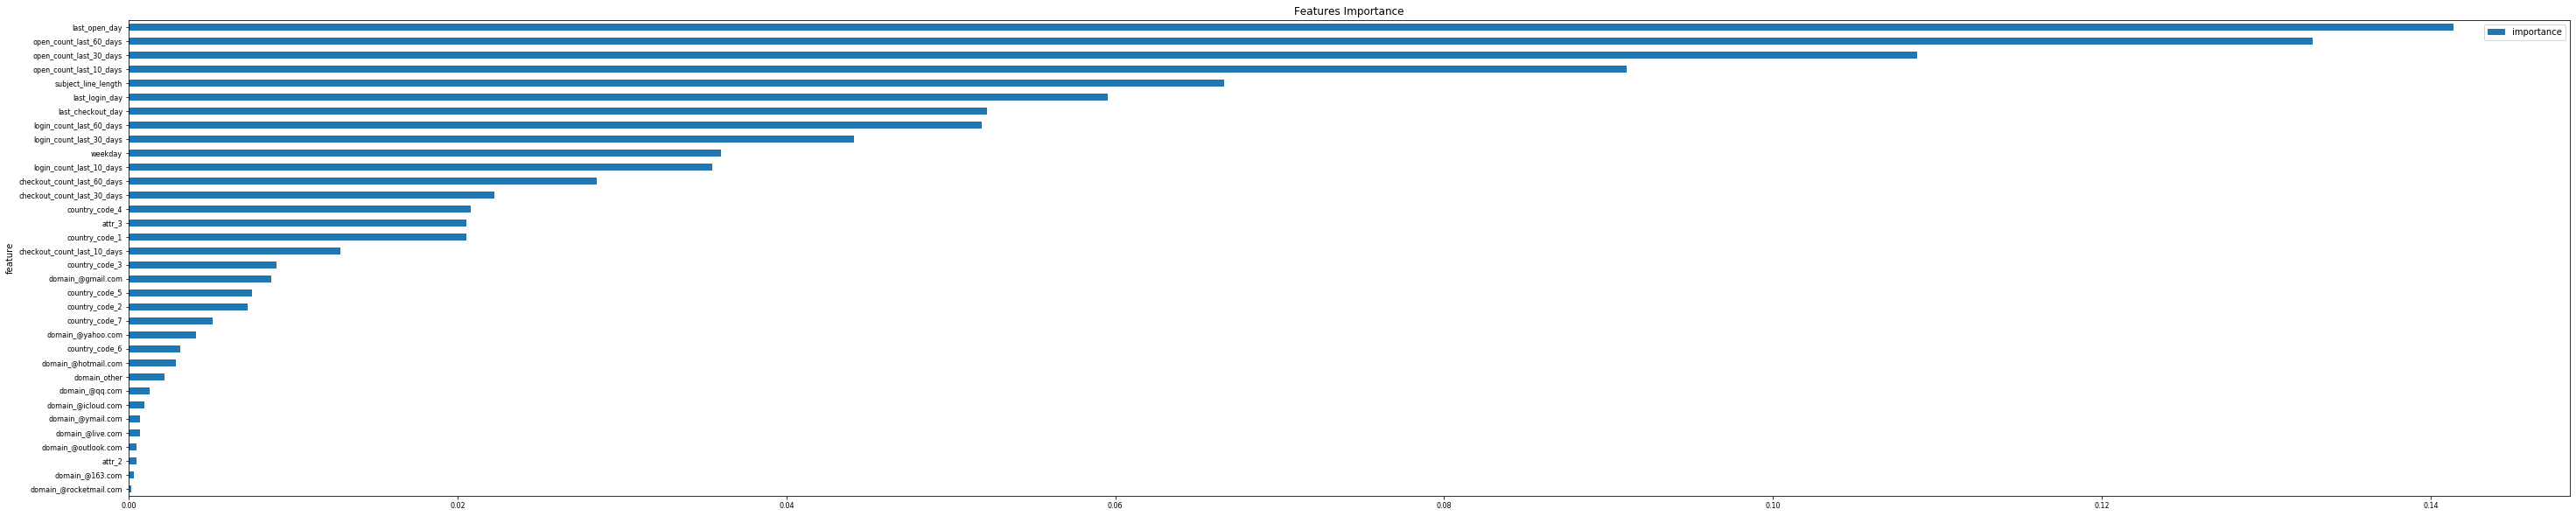

In [12]:
model = GradientBoostingClassifier(max_depth=15,n_estimators = 300,max_features = 'sqrt',
                                   random_state=8,learning_rate=0.1)

classification_model_Test(model, X_train, y_train, X_test, y_test)
features_importance(model, dataset,predictor_var,outcome_var)

In [13]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/Gradient_Boosting_Classifier_trained_model_dataset2.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/Gradient_Boosting_Classifier_trained_model_dataset2.pkl') 

['model/Gradient_Boosting_Classifier_trained_model_dataset2.pkl']

<h3>K Nearest Neigbors KNN Model<h3>

In [14]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='distance')
classification_model_Test(model, X_train, y_train, X_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy on training set: 1.000
Accuracy on test set: 0.909
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      6156
           1       0.85      1.00      0.92      6201

    accuracy                           0.91     12357
   macro avg       0.92      0.91      0.91     12357
weighted avg       0.92      0.91      0.91     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

*************************************************************
Metric Performance of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Confusion Matrix : 
 [[5060 1096]
 [  24 6177]]
Cross Validation Score = 82.253%

Coefficient of determination:0.637


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [15]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/KNN_trained_model_dataset2.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/KNN_trained_model_dataset1.pkl') 

['model/KNN_trained_model_dataset1.pkl']

<h3>Support Vector Machine Model<h3>

In [16]:
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovo', degree=3, gamma=2, kernel='rbf',
            max_iter=-1, probability=True, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
classification_model_Test(model, X_train, y_train, X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 0.972
Accuracy on test set: 0.950
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6156
           1       0.95      0.96      0.95      6201

    accuracy                           0.95     12357
   macro avg       0.95      0.95      0.95     12357
weighted avg       0.95      0.95      0.95     12357



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

*************************************************************
Metric Performance of : <class 'sklearn.svm._classes.SVC'>

Confusion Matrix : 
 [[5814  342]
 [ 274 5927]]
Cross Validation Score = 74.096%

Coefficient of determination:0.801


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# We can save the trained model clf using pickle 
s = pickle.dumps(model)
pickle.dump( model, open( "model/SVM_trained_model_dataset2.p", "wb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
joblib.dump(model, 'model/SVM_trained_model_dataset2.pkl') 

['model/SVM_trained_model_dataset2.pkl']

<h3> X Validation set <h3>

In [25]:
xls3    = pd.ExcelFile('data/X_val_scaled_dataset2.xlsx')
X_val = pd.read_excel(xls3, 'X_val_scaled')
y_val = pd.read_excel(xls3, 'y_val')

dataset_test = X_val
dataset_test['open_flag'] = y_val['open_flag']

X_val = X_val.drop(['open_flag'],axis=1)

In [26]:
outcome_var = 'open_flag'
predictor_var = y_val.columns

In [27]:
dataset_test.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,open_flag
0,0.050837,-1.038883,-0.534578,-0.354615,-0.018636,1.857672,1.315214,1.736157,0.679403,-0.649055,...,-0.052586,-0.151201,-0.675049,1.959408,-0.463877,-0.379728,-0.31,-0.231596,-0.200473,0
1,-19.670542,0.915217,-1.162714,3.525579,-0.139768,-0.599636,-0.728400,-0.790147,-0.794251,1.392056,...,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,2.633467,-0.31,-0.231596,-0.200473,1
2,0.050837,-1.038883,-0.444845,-0.358507,0.419748,1.857672,-0.319677,-0.316465,-0.241631,-0.649055,...,-0.052586,6.613711,-0.675049,-0.510358,-0.463877,-0.379728,-0.31,4.317866,-0.200473,1
3,0.050837,-0.061833,-0.983247,3.525579,-0.113811,-0.578602,-0.728400,-0.790147,-0.794251,-0.573458,...,-0.052586,-0.151201,-0.675049,-0.510358,2.155745,-0.379728,-0.31,-0.231596,-0.200473,1
4,0.050837,-1.038883,-0.893513,-0.323480,-0.142652,-0.140592,-0.728400,-0.632253,-0.702147,-0.346668,...,-0.052586,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.31,-0.231596,-0.200473,0


In [28]:
X_val.count()

attr_2                         11121
attr_3                         11121
subject_line_length            11121
last_open_day                  11121
last_login_day                 11121
last_checkout_day              11121
open_count_last_10_days        11121
open_count_last_30_days        11121
open_count_last_60_days        11121
login_count_last_10_days       11121
login_count_last_30_days       11121
login_count_last_60_days       11121
checkout_count_last_10_days    11121
checkout_count_last_30_days    11121
checkout_count_last_60_days    11121
weekday                        11121
domain_@163.com                11121
domain_@gmail.com              11121
domain_@hotmail.com            11121
domain_@icloud.com             11121
domain_@live.com               11121
domain_@outlook.com            11121
domain_@qq.com                 11121
domain_@rocketmail.com         11121
domain_@yahoo.com              11121
domain_@ymail.com              11121
domain_other                   11121
c

In [29]:
y_val.count()

open_flag    11121
dtype: int64

<h3>Random Forest Classifier<h3>

In [30]:
# Load the classifier model
model = pickle.load( open( "model/Random_Forest_trained_model_dataset2.p", "rb" ) )

In [31]:
classification_model_Val(model, X_val, y_val)

Accuracy on training set: 0.947
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      5634
           1       0.92      0.97      0.95      5487

    accuracy                           0.95     11121
   macro avg       0.95      0.95      0.95     11121
weighted avg       0.95      0.95      0.95     11121



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Confusion Matrix : 
 [[5182  452]
 [ 139 5348]]
Cross Validation Score = 82.870%

Coefficient of determination:0.787


<h3>Gradient Booster Classifier<h3>

In [34]:
# Load the classifier model
model = pickle.load( open( "model/Gradient_Boosting_Classifier_trained_model_dataset2.p", "rb" ) )

In [35]:
classification_model_Val(model, X_val, y_val)

Accuracy on training set: 0.972
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5634
           1       0.95      1.00      0.97      5487

    accuracy                           0.97     11121
   macro avg       0.97      0.97      0.97     11121
weighted avg       0.97      0.97      0.97     11121

*************************************************************
Metric Performance of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>

Confusion Matrix : 
 [[5344  290]
 [  23 5464]]
Cross Validation Score = 82.915%

Coefficient of determination:0.887


<h3>K Nearest Neighbor<h3>

In [36]:
# Load the classifier model
model = pickle.load( open( "model/KNN_trained_model_dataset2.p", "rb" ) )

In [37]:
classification_model_Val(model, X_val, y_val)

Accuracy on training set: 0.907
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5634
           1       0.84      1.00      0.91      5487

    accuracy                           0.91     11121
   macro avg       0.92      0.91      0.91     11121
weighted avg       0.92      0.91      0.91     11121

*************************************************************
Metric Performance of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Confusion Matrix : 
 [[4608 1026]
 [  10 5477]]
Cross Validation Score = 82.151%

Coefficient of determination:0.627


<h3>Support Vector Machine<h3>

In [38]:
# Load the classifier model
model = pickle.load( open( "model/SVM_trained_model_dataset2.p", "rb" ) )

In [39]:
classification_model_Val(model, X_val, y_val)

Accuracy on training set: 0.945
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5634
           1       0.94      0.95      0.94      5487

    accuracy                           0.94     11121
   macro avg       0.94      0.95      0.94     11121
weighted avg       0.95      0.94      0.94     11121

*************************************************************
Metric Performance of : <class 'sklearn.svm._classes.SVC'>

Confusion Matrix : 
 [[5303  331]
 [ 281 5206]]
Cross Validation Score = 73.204%

Coefficient of determination:0.780
